# 1. Find missing values

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
student_data = pd.read_csv("../Data/student-mat-missing-data.csv")
student_data


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
391,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
392,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
393,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


In [4]:
student_data.head()
student_data.info()
student_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,197.000000,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,114.170924,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [5]:
student_data.value_counts()


Unnamed: 0  school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0           GP      F    18.0  U        GT3      A        4     4     at_home   teacher   course      mother    2           2          0         yes        no      no    no          yes      yes     no        no        4.0     3.0       4.0    1     1     3.0     6.0       5   6   6     1
258         GP      M    18.0  U        GT3      T        2     1     other     other     home        mother    1           2          0         no         no      no    yes         yes      yes     yes       no        5.0     2.0       4.0    1     2     4.0     8.0       15  14  14    1
267         GP      F    18.0  R        GT3      T        4     4     teacher   other     reputation  mother    2           2          

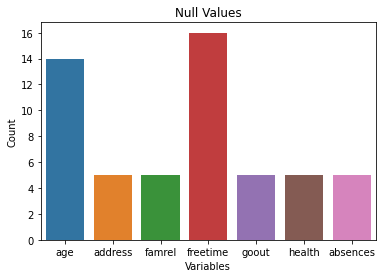

In [6]:
from data_utils import plot_missing
plot_missing(student_data)

In [7]:
nulls_freetime = student_data.index[student_data["freetime"].isnull() == True].tolist()
print(nulls_freetime)

[87, 99, 130, 149, 151, 160, 191, 257, 276, 293, 308, 330, 343, 359, 372, 385]


In [8]:
nulls_age = student_data.index[student_data["age"].isnull() == True].tolist()
nulls_freetime_age = sorted(nulls_freetime + [row for row in nulls_age if row not in nulls_freetime])
print(nulls_freetime_age)

[20, 71, 87, 99, 102, 106, 121, 130, 149, 151, 160, 188, 191, 214, 257, 270, 276, 293, 308, 330, 343, 348, 359, 372, 385]


In [9]:
missing_rowwise = pd.DataFrame({"Missing Values":student_data.isnull().sum(axis=1)})
missing_rowwise_above = missing_rowwise[missing_rowwise["Missing Values"] > 1]
print(f"The {len(missing_rowwise_above)} rows that are missing more than one value constitutes {len(missing_rowwise_above)/len(student_data):.4f} of the dataset")

The 5 rows that are missing more than one value constitutes 0.0127 of the dataset


# 2. Clean the data

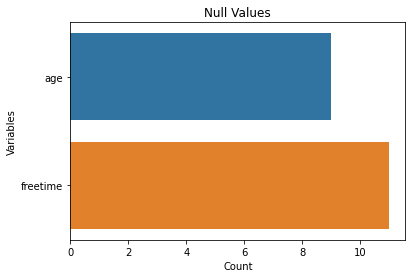

In [13]:
missing_data = student_data.drop(missing_rowwise_above.index, axis=0).reset_index(drop=True)
plot_missing(missing_data, x_axis=False)

In [23]:
missing_data = student_data.drop(missing_rowwise_above.index, axis=0).reset_index(drop=True)
missing_data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,5.0,4.0,4,5,4.0,11.0,9,9,9
386,391,MS,M,17.0,U,LE3,T,3,1,services,...,2.0,4.0,5.0,3,4,2.0,3.0,14,16,16
387,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,5.0,3.0,3,3,3.0,3.0,10,8,7
388,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,4.0,1.0,3,4,5.0,0.0,11,12,10


Text(0.5, 1.0, 'The age distribution.')

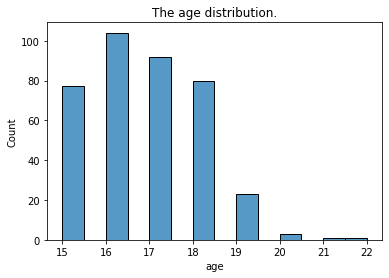

In [24]:
#visualising the age distribution in the dataset 
sns.histplot(data=missing_data["age"], binwidth=0.5).set_title("The age distribution.")

In [26]:
#Check which columns there are in the dataset to see what can be utilised in determining the age
missing_data.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [27]:
#see which unique values it can have
missing_data["higher"].unique()

array(['yes', 'no'], dtype=object)

Text(0.5, 1.0, 'Age distribution, higher is no')

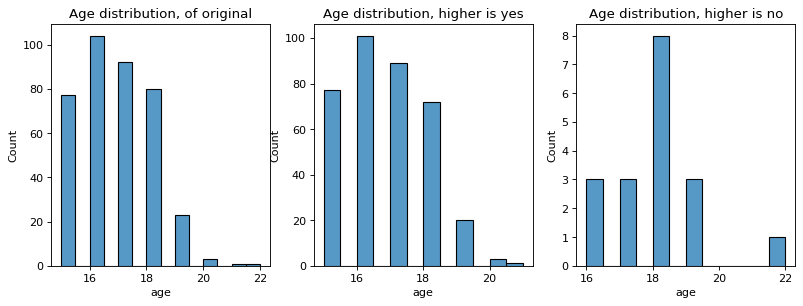

In [31]:
import matplotlib.pyplot as plt

higher_yes = missing_data[missing_data["higher"]=="yes"]
higher_no = missing_data[missing_data["higher"]=="no"]

fig, ax = plt.subplots(1, 3, dpi=80, figsize=(12,4))
sns.histplot(data=missing_data["age"], ax=ax[0], binwidth=0.5).set_title("Age distribution, of original")
sns.histplot(data=higher_yes["age"], ax=ax[1], binwidth=0.5).set_title("Age distribution, higher is yes")
sns.histplot(data=higher_no["age"], ax=ax[2], binwidth=0.5).set_title("Age distribution, higher is no")



In [32]:
#create a new column called Alcohol, which is a sum of Dalc and Walc columns
missing_data["Alcohol"] = missing_data["Dalc"] + missing_data["Walc"]
missing_data

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,390,MS,M,20.0,U,LE3,A,2,2,services,...,5.0,4.0,4,5,4.0,11.0,9,9,9,9
386,391,MS,M,17.0,U,LE3,T,3,1,services,...,4.0,5.0,3,4,2.0,3.0,14,16,16,7
387,392,MS,M,21.0,R,GT3,T,1,1,other,...,5.0,3.0,3,3,3.0,3.0,10,8,7,6
388,393,MS,M,18.0,R,LE3,T,3,2,services,...,4.0,1.0,3,4,5.0,0.0,11,12,10,7


[Text(0.5, 1.0, 'Alcohol Consumption per Age Group'), Text(0.5, 0, 'Age')]

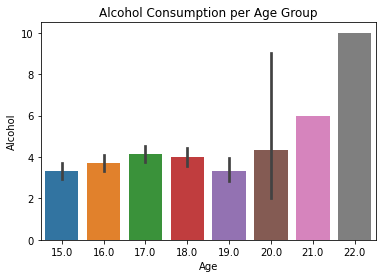

In [33]:
#Make a bar chart for alcohol consumption vs age
sns.barplot(data=missing_data, x="age", y="Alcohol").set(title="Alcohol Consumption per Age Group", xlabel="Age")


In [35]:
#exclude data for age >=19
young_students = missing_data.drop(missing_data.index[missing_data["age"] >= 19].tolist()).reset_index(drop=True)
young_students

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Alcohol
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,3.0,4.0,1,1,3.0,6.0,5,6,6,2
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,3.0,3.0,1,1,3.0,4.0,5,5,6,2
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,3.0,2.0,2,3,3.0,10.0,7,8,10,5
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,2.0,2.0,1,1,5.0,2.0,15,14,15,2
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,3.0,2.0,1,2,5.0,4.0,6,10,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,386,MS,F,18.0,R,GT3,T,4,4,teacher,...,4.0,3.0,2,2,5.0,7.0,6,5,6,4
358,388,MS,F,18.0,U,LE3,T,3,1,teacher,...,3.0,4.0,1,1,1.0,0.0,7,9,8,2
359,389,MS,F,18.0,U,GT3,T,1,1,other,...,1.0,1.0,1,1,5.0,0.0,6,5,0,2
360,391,MS,M,17.0,U,LE3,T,3,1,services,...,4.0,5.0,3,4,2.0,3.0,14,16,16,7
